In [1]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2

img = cv2.imread('car.jpg')

print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))

Image Properties
- Number of Pixels: 151392
- Shape/Dimensions: (152, 332, 3)


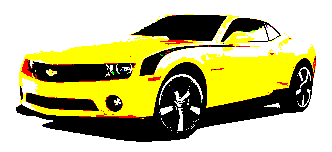

In [10]:
r, threshold = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)
cv2_imshow(threshold)

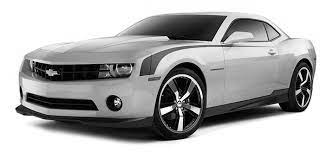

In [8]:
from google.colab.patches import cv2_imshow

blue, green, red = cv2.split(img) # Split the image into its channels
img_gs = cv2.imread('car.jpg', cv2.IMREAD_GRAYSCALE) # Convert image to grayscale

#cv2_imshow(red) # Display the red channel in the image
#cv2_imshow(blue) # Display the red channel in the image
#cv2_imshow(green) # Display the red channel in the image
cv2_imshow(img_gs) # Display the grayscale version of image



<ipython-input-11-19579ae42018>:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output[coords] = 1
<ipython-input-11-19579ae42018>:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output[coords] = 0


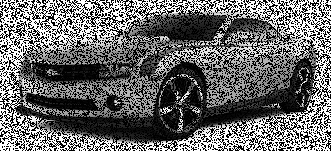

True

In [11]:
import numpy as np

# Adding salt & pepper noise to an image
def salt_pepper(prob):
      # Extract image dimensions
      row, col = img_gs.shape

      # Declare salt & pepper noise ratio
      s_vs_p = 0.5
      output = np.copy(img_gs)

      # Apply salt noise on each pixel individually
      num_salt = np.ceil(prob * img_gs.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in img_gs.shape]
      output[coords] = 1

      # Apply pepper noise on each pixel individually
      num_pepper = np.ceil(prob * img_gs.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in img_gs.shape]
      output[coords] = 0
      cv2_imshow(output)

      return output

# Call salt & pepper function with probability = 0.5
# on the grayscale image of rose
sp_05 = salt_pepper(0.5)

# Store the resultant image as 'sp_05.jpg'
cv2.imwrite('sp_05.jpg', sp_05)



--- Effects on S&P Noise Image with Probability 0.5 ---




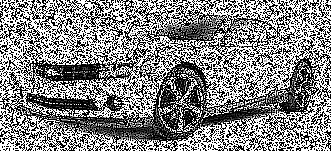

In [12]:
# Create our sharpening kernel, the sum of all values must equal to one for uniformity
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1, 9,-1],
                              [-1,-1,-1]])

# Applying the sharpening kernel to the grayscale image & displaying it.
print("\n\n--- Effects on S&P Noise Image with Probability 0.5 ---\n\n")

# Applying filter on image with salt & pepper noise
sharpened_img = cv2.filter2D(sp_05, -1, kernel_sharpening)
cv2_imshow(sharpened_img)



---Effects on S&P Noise Image with Probability 0.5---




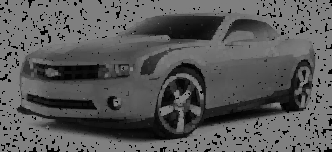

In [13]:
from scipy.ndimage import maximum_filter, minimum_filter

def midpoint(img):
    maxf = maximum_filter(img, (3, 3))
    minf = minimum_filter(img, (3, 3))
    midpoint = (maxf + minf) / 2
    cv2_imshow(midpoint)

print("\n\n---Effects on S&P Noise Image with Probability 0.5---\n\n")
midpoint(sp_05)



--- Effects on S&P Noise Image with Probability 0.5 ---




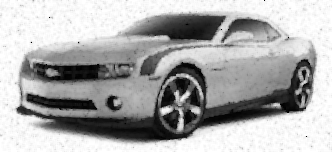

In [14]:
def contraharmonic_mean(img, size, Q):
    num = np.power(img, Q + 1)
    denom = np.power(img, Q)
    kernel = np.full(size, 1.0)
    result = cv2.filter2D(num, -1, kernel) / cv2.filter2D(denom, -1, kernel)
    return result

print("\n\n--- Effects on S&P Noise Image with Probability 0.5 ---\n\n")
cv2_imshow(contraharmonic_mean(sp_05, (3,3), 0.5))